<h1>Table of contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Data-description" data-toc-modified-id="Data-description-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#Work-plan" data-toc-modified-id="Work-plan-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Work plan</a></span></li></ul></li><li><span><a href="#Data-load" data-toc-modified-id="Data-load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data load</a></span></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#Interim-conclusion" data-toc-modified-id="Interim-conclusion-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Interim conclusion</a></span></li></ul></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#Interim-conclusion" data-toc-modified-id="Interim-conclusion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Interim conclusion</a></span></li></ul></li><li><span><a href="#Build-model" data-toc-modified-id="Build-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Build model</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Gold mining from ore

Company develops solutions for efficient operation of industrial plants.
Model should predict recovery rate of gold from ore. Model is supposed to optimize production what will help to run plant with profitable characteristics.

### Data description

Technological process and stages:

`1. Flotation:`

Mixture of gold-bearing ore is fed to float banks. After enrichment, rough concentrate and tails are obtained, i.e. product residues with low concentration of precious metals. Stability of this process is affected by inconsistent and non-optimal physical and chemical state of flotation pulp (mixture of solid particles and liquid).

`2. Cleaner process:`
Rougher concentrate undergoes two purifications. Output is final concentrate and new tails.

**Technological process:**

- `Rougher feed` — raw material
- `Rougher additions` — flotation reagents:
  - 1. Xanthate 
  - 2. Sulphate 
  - 3. Depressant 
- `Rougher process`  — flotation
- `Rougher tails` — product residues
- `Float banks` — flotation unit
- `Cleaner process` — purification
- `Rougher Au` — rougher gold concentrate
- `Final Au` — final gold concentrate

**Parameters of stages:**

- `air amount`
- `fluid levels`
- `feed size`
- `feed rate`

**Meaning of features in data**

Description:

**[stage].[parameter_type].[parameter_name]**

Possible values for **[stage]:**

- `rougher`
- `primary_cleaner`
- `secondary_cleaner`

Final possible values for **[parameter_type]:**
- `input`
- `output`
- `state`
- `calculation`

### Work plan

**1. Prepare data:**

   - Check enrichment efficiency and calculate it on training sample for rougher.output.recovery feature. Find MAE for calculations and the value of feature.

   - Analyze features which are not available in test sample.

   - Data preprocessing.


**2. Data analysis:**

   - Analyze concentration of metals (Au, Ag, Pb) at different stages of purification.

   - For training and test samples compare pellet size distributions of rougher feed.

   - Explore total concentration of all substances at different stages: rougher feed, rougher Au, final Au 
   

**3. Build model:**

   - Write function to calculate final sMAPE.

   - Learn models and check their quality. 
   
   - Choose best model and ckeck it on test data set.
   
   - Compare with constant model.


**4. Make conclusion.**

## Data load

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                   
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

STATE = np.random.RandomState(12345)

In [3]:
try:
    full = pd.read_csv('C:/Users/SATVRN/Desktop/Учеба/09 Сборный проект 2/gold_recovery_full_new.csv')
    test = pd.read_csv('C:/Users/SATVRN/Desktop/Учеба/09 Сборный проект 2/gold_recovery_test_new.csv')
    train = pd.read_csv('C:/Users/SATVRN/Desktop/Учеба/09 Сборный проект 2/gold_recovery_train_new.csv')
except:
    full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    train = pd.read_csv('/datasets/gold_recovery_train_new.csv')

## Data analysis

In [4]:
def get_data_name(data):
    name =[x for x in globals() if globals()[x] is data][0]
    return name

datas = [full, test, train]
for data in datas:
    print('\n\033[1m' + 'Dataframe info', get_data_name(data), '\n')
    print('First five lines:' + '\033[0m')
    display(data.head())
    print('\n\033[1m' + 'General info:\n' + '\033[0m')
    data.info()
    print('\n\033[1m' + 'Descriptive statistics:\n' + '\033[0m')
    display(data.describe())
    print('\n\033[1m' + 'Number of explicit duplicates:\n' + '\033[0m')
    display(data.duplicated().sum())
    print('\n\033[1m' + 'Number of missing values:\n' + '\033[0m')
    display(data.isna().sum())
    print('--------------------------------------------------------------')


Dataframe info full 

First five lines:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.


General info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 no

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438


Number of explicit duplicates:



0


Number of missing values:



date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.output.concentrate_sol                 3

--------------------------------------------------------------

Dataframe info test 

First five lines:


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50


General info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20


Number of explicit duplicates:



0


Number of missing values:



date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

--------------------------------------------------------------

Dataframe info train 

First five lines:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.


General info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 no

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148


Number of explicit duplicates:



0


Number of missing values:



date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 2

--------------------------------------------------------------


### Interim conclusion
- There are missing values in all data sets.
- No explicit duplicates.
- Types of features are ok, except `date`. 
- Descriptive statistics shows that distribution of data is normal, except for `'rougher.calculation.sulfate_to_au_concentrate'`, `'rougher.calculation.floatbank10_sulfate_to_au_feed'`, `'rougher.calculation.floatbank11_sulfate_to_au_feed'` features. Max values here are **3.428099e+06**,	**629638.977914**,	**718684.955855** respectively. But there are very little abnormal values and they don't affect on average.

## Data preprocessing

Check if enrichment efficiency is calculated correctly

In [5]:
train['rougher.output.recovery'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

In [6]:
train['recovery'] = ((train['rougher.output.concentrate_au'] 
                      * (train['rougher.input.feed_au'] 
                      - train['rougher.output.tail_au'])) 
                      / (train['rougher.input.feed_au'] 
                      * (train['rougher.output.concentrate_au'] 
                      - train['rougher.output.tail_au'])) * 100)
train['recovery'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: recovery, dtype: float64

In [7]:
print(mean_absolute_error(train['rougher.output.recovery'], train['recovery']))

9.73512347450521e-15


Enrichment efficiency is calculated correctly

Analyze features which are not available in test sample

In [8]:
display(set(train.columns.values.tolist()).difference(test.columns.values.tolist()))

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'recovery',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'roug

There are no features with `output` stage in test sample. If they are, there is nothing to predict

According to task, data is indexed by date and time of information receivement (`date` feature). Time-neighboring parameters are often similar. Let's convert `date` feature to index, and fill in missing values with previous value

In [9]:
full = full.fillna(method='ffill')
full.set_index('date', inplace=True)
print(full.isna().sum().sum())

train = train.fillna(method='ffill')
train.set_index('date', inplace=True)
print(train.isna().sum().sum())

test = test.fillna(method='ffill')
test.set_index('date', inplace=True)
print(test.isna().sum().sum())

0
0
0


## Data analysis

Analyze concentration of metals (Au, Ag, Pb) at different stages of purification

In [10]:
def concentrate_metalls(column_1, column_2, column_3, column_4, color):
    full[[column_1, 
          column_2, 
          column_3, 
          column_4]].mean().plot(kind="bar", color=color)

    plt.xticks(rotation = 30)
    plt.show()

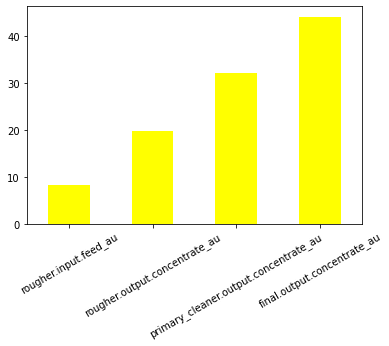

In [11]:
concentrate_metalls('rougher.input.feed_au', 
                    'rougher.output.concentrate_au', 
                    'primary_cleaner.output.concentrate_au', 
                    'final.output.concentrate_au', 
                                                           'yellow')

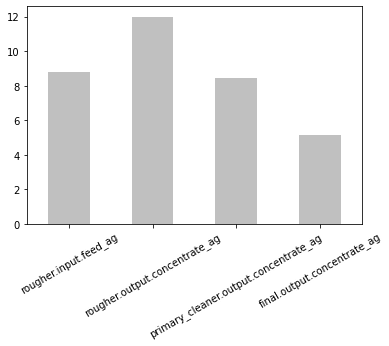

In [12]:
concentrate_metalls('rougher.input.feed_ag', 
                    'rougher.output.concentrate_ag', 
                    'primary_cleaner.output.concentrate_ag', 
                    'final.output.concentrate_ag', 
                                                           'silver')

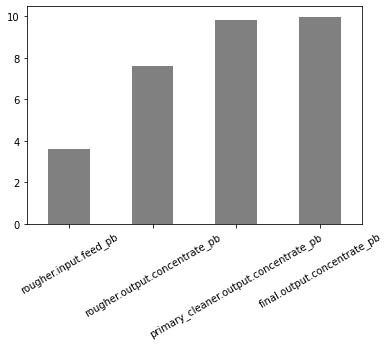

In [13]:
concentrate_metalls('rougher.input.feed_pb', 
                    'rougher.output.concentrate_pb', 
                    'primary_cleaner.output.concentrate_pb', 
                    'final.output.concentrate_pb', 
                                                           'grey')

- Концетрация `золота` с момента подачи сырья и до финального этапа увеличивается более, чем в **4 раза**.
- Концетрация `серебра` с момента подачи сырья и после флотации увеличивается, а после первичной очистки и на финальном этапах уменьшается. На финальном этапе концетрация серебра меньше примерно в **1,5 раза**, чем на начальном этапе.
- Концетрация `свинца` с момента подачи сырья и до финального этапа стабильно увеличивается примерно в **2,5 раза**.

Compare pellet size distributions of rougher feed for `training` and `test` samples 

Text(0.5, 0, 'Size')

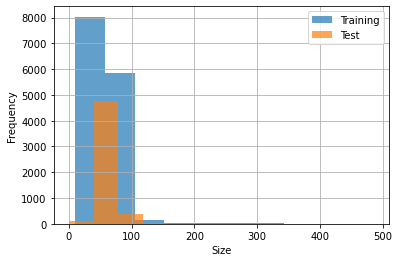

In [14]:
train['rougher.input.feed_size'].plot(kind="hist", alpha=0.7, grid = True)
test['rougher.input.feed_size'].plot(kind="hist", alpha=0.7, grid = True)

plt.legend(['Training', 'Test'])
plt.xlabel('Size')

Text(0.5, 0, 'Size')

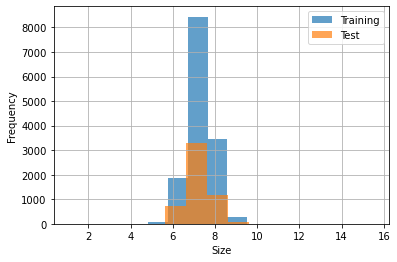

In [15]:
train['primary_cleaner.input.feed_size'].plot(kind="hist", alpha=0.7, grid = True)
test['primary_cleaner.input.feed_size'].plot(kind="hist", alpha=0.7, grid = True)

plt.legend(['Training', 'Test'])
plt.xlabel('Size')

Distributions are virtually indistinguishable from each other, model estimate will be **right**

Compare total concentration of **each** substance at different stages: in `rougher feed`, `rougher Au` and `final Au`

In [16]:
def concentrate_by_stage(column_1, column_2, column_3, column_4):
    full[[column_1, 
          column_2, 
          column_3, 
          column_4]].sum().plot(kind="bar", 
                                alpha=0.7, 
                                grid = True, 
                                color=['silver', 'grey','blue','yellow'])

    plt.xticks(rotation = 30)
    plt.show()

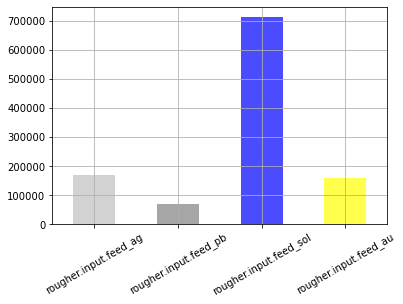

In [17]:
concentrate_by_stage('rougher.input.feed_ag', 
                     'rougher.input.feed_pb', 
                     'rougher.input.feed_sol', 
                     'rougher.input.feed_au')

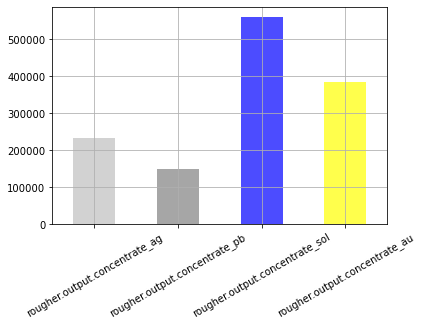

In [18]:
concentrate_by_stage('rougher.output.concentrate_ag', 
                     'rougher.output.concentrate_pb', 
                     'rougher.output.concentrate_sol', 
                     'rougher.output.concentrate_au')

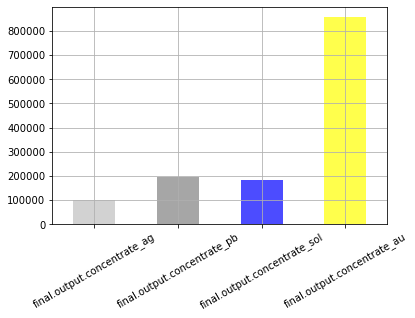

In [19]:
concentrate_by_stage('final.output.concentrate_ag', 
                     'final.output.concentrate_pb', 
                     'final.output.concentrate_sol', 
                     'final.output.concentrate_au')

It's clear that concentration of `gold` **grows** after each purification step. But concentration of `sulphate` significantly **decreases** at final purification stage. `silver` concentration **grows** after flotation and **decreases** at final stage. Concentration of `lead` steadily **increases**

Compare total concentration of **all** substance at different stages: in `rougher feed`, `rougher Au` and `final Au`

In [20]:
feed_concentrate = (full['rougher.input.feed_ag'] 
                    + full['rougher.input.feed_pb'] 
                    + full['rougher.input.feed_sol'] 
                    + full['rougher.input.feed_au'])

rougher_concentrate = (full['rougher.output.concentrate_ag'] 
                       + full['rougher.output.concentrate_pb'] 
                       + full['rougher.output.concentrate_sol'] 
                       + full['rougher.output.concentrate_au'])

final_concentrate = (full['final.output.concentrate_ag'] 
                     + full['final.output.concentrate_pb'] 
                     + full['final.output.concentrate_sol'] 
                     + full['final.output.concentrate_au'])

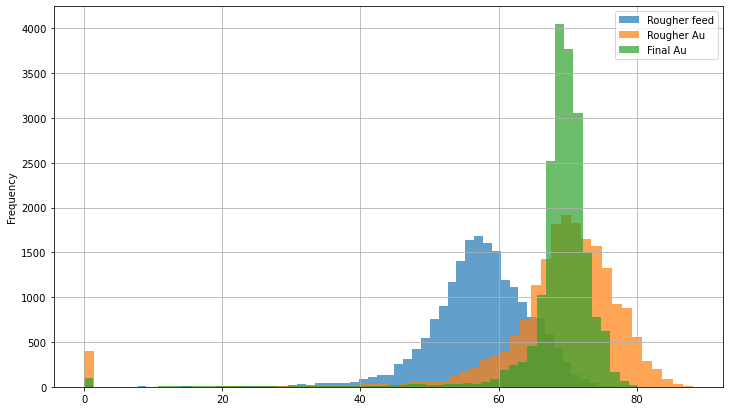

In [21]:
feed_concentrate.plot(kind="hist", alpha=0.7, grid = True, figsize=(12, 7), bins = 60)
rougher_concentrate.plot(kind="hist", alpha=0.7, grid = True, figsize=(12, 7), bins = 60)
final_concentrate.plot(kind="hist", alpha=0.7, grid = True, figsize=(12, 7), bins = 60)

plt.legend(['Rougher feed', 'Rougher Au', 'Final Au'])

Distribution of `final Au` is more collected, which indicates that values are distributed **better** near mean. Nevertheless, there are **outliers** near **0**. Get rid of them:

In [22]:
full = full.query('@feed_concentrate > 3 & @rougher_concentrate > 3 & @final_concentrate > 3')

Drop from `train` sample those features which are not in `test` sample

In [23]:
drop_test = train.columns.drop(test.columns)
train.drop(drop_test, axis=1, inplace=True)

Add target feature

In [24]:
train = pd.merge(train, 
                 full[['rougher.output.recovery', 'final.output.recovery']], 
                 left_index=True, 
                 right_index=True)

test = pd.merge(test, 
                full[['rougher.output.recovery', 'final.output.recovery']], 
                left_index=True, 
                right_index=True)

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13787 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               13787 non-null  float64
 1   primary_cleaner.input.depressant            13787 non-null  float64
 2   primary_cleaner.input.feed_size             13787 non-null  float64
 3   primary_cleaner.input.xanthate              13787 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      13787 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    13787 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      13787 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    13787 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      13787 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    13787 non-nu

### Interim conclusion
- No missing values
- Distributions are virtually indistinguishable from each other, model estimate will be right
- Target feature has been added
- Got rid of outliers
- **Data is prepared**

## Build model

Write function to calculate `sMAPE` and `final sMAPE`:

In [25]:
def smape(target, predictions):
    return 1 / len(target) * np.sum(2 * np.abs(target - predictions) / (np.abs(target) + np.abs(predictions)) * 100)

In [26]:
def final_smape(target, predictions):
    return (0.25 * smape(target.iloc[:, 0], predictions[:, 0]) + 0.75 * smape(target.iloc[:, 1], predictions[:, 1]))

Use `make scorer`

In [27]:
smape_score = make_scorer(final_smape, greater_is_better=False)

Train test split

In [28]:
features_train = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis='columns')
target_train = train[['rougher.output.recovery', 'final.output.recovery']]

features_test = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis='columns')
target_test = test[['rougher.output.recovery', 'final.output.recovery']]

Learn models

In [29]:
dtr_model = DecisionTreeRegressor(random_state=STATE)

parametrs_dtr_model = {'max_depth': range (1, 11)}
                            
grid_dtr_model = GridSearchCV(dtr_model, parametrs_dtr_model, cv=5, n_jobs=-1, scoring=smape_score)

grid_dtr_model.fit(features_train, target_train)

print('Best sMAPE is equal to', 
      grid_dtr_model.best_score_, 
      'with parameters', 
      grid_dtr_model.best_params_)

Best sMAPE is equal to -8.965915609155862 with parameters {'max_depth': 1}


In [30]:
rfr_model = RandomForestRegressor(random_state=STATE)

parametrs_rfr_model = {'n_estimators': range (10, 31, 10),
                       'max_depth': range (1, 11, 4)}
                            
grid_rfr_model = GridSearchCV(rfr_model, parametrs_rfr_model, cv=5, n_jobs=-1, scoring=smape_score)

grid_rfr_model.fit(features_train, target_train)

print('Best sMAPE is equal to', 
      grid_rfr_model.best_score_, 
      'with parameters', 
      grid_rfr_model.best_params_)

Best sMAPE is equal to -8.848115391997593 with parameters {'max_depth': 5, 'n_estimators': 20}


In [31]:
lr_model = LinearRegression()
lr_model.fit(features_train, target_train)
scores_lr = cross_val_score(lr_model, features_train, target_train, cv=5, n_jobs=-1, scoring=smape_score)
print('Mean sMAPE is equal to', scores_lr.mean())

Mean sMAPE is equal to -10.02703131489921


`RandomForestRegressor` has best `sMAPE` which is equal to **8.848**  .

Check best model on test sample and compare with constant model:

In [32]:
rfr_model_test = RandomForestRegressor(random_state=STATE, n_estimators=20, max_depth=5)
rfr_model_test.fit(features_train, target_train)
prediction_test = rfr_model_test.predict(features_test)
score = smape(prediction_test, target_test)
score

rougher.output.recovery    4.726578
final.output.recovery      8.097622
dtype: float64

In [33]:
rfr = round(final_smape(target_test, prediction_test), 3)

In [34]:
dummy_r = DummyRegressor(strategy='mean')
dummy_r.fit(features_train, target_train)
predicted_test = dummy_r.predict(features_test)
dr =  round(final_smape(target_test, predicted_test), 3)

In [35]:
result = pd.DataFrame([rfr, dr], 
                       columns=['sMAPE'], 
                       index=['RandomForestRegressor',
                              'DummyRegressor'])
result

,sMAPE
RandomForestRegressor,7.255
DummyRegressor,7.766


## Conclusion
- Best model is `RandomForestRegressor` with **depth** is equal to **5** and **estimators** is equal to **20**.
- `Final sMAPE` on `test` sample is equal to **7.255**
- `Final sMAPE` of `constant` model is equal to **7.766**
- **Validity check is done**